## Compare models with various loss

In [1]:
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
!ls ../csvs/t5*

../csvs/t5-c2x2-1.0366e-01.csv	../csvs/t5-c2x2-6.0737e-02.csv
../csvs/t5-c2x2-3.0742e-02.csv


In [7]:
df = pd.concat({
    'loss=1.4547e-2':   pd.read_csv("../csvs/t4-c2x2-mcts-c=100-steps=100k.csv"),
    'loss=3.0742e-2':   pd.read_csv("../csvs/t5-c2x2-3.0742e-02.csv"),
    'loss=6.0737e-2':   pd.read_csv("../csvs/t5-c2x2-6.0737e-02.csv"),
    'loss=1.0366e-1':   pd.read_csv("../csvs/t5-c2x2-1.0366e-01.csv"),
})
df.index.set_names(['loss', 'idx'], inplace=True)
df.reset_index(level=0, inplace=True)
df['speed'] = df.solve_steps/df.duration

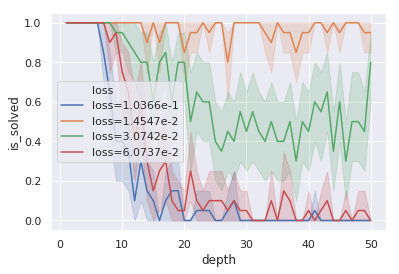

In [8]:
sns.lineplot('depth', 'is_solved', data=df, hue='loss');

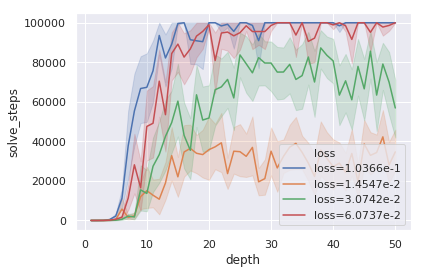

In [14]:
sns.lineplot('depth', 'solve_steps', data=df, hue='loss');

In [10]:
df.columns

Index(['loss', 'start_dt', 'stop_dt', 'duration', 'depth', 'scramble',
       'is_solved', 'solve_steps', 'sol_len_naive', 'sol_len_bfs',
       'tree_depth_max', 'tree_depth_mean', 'speed'],
      dtype='object')

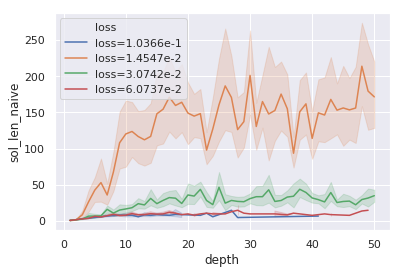

In [12]:
sns.lineplot('depth', 'sol_len_naive', data=df[df.is_solved==1], hue='loss');

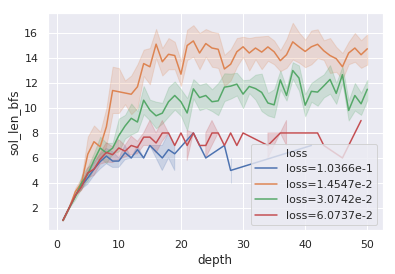

In [15]:
sns.lineplot('depth', 'sol_len_bfs', data=df[df.is_solved==1], hue='loss');